In [2]:
import pandas as pd
import sqlite3

## Connect to sqlite database with players data

In [3]:
cnx = sqlite3.connect('Database/fpa-database.db')

df_players = pd.read_sql_query("SELECT * FROM players_transfermarkt", cnx)
print(df_players)

        id       player_name        date_of_birth player_position  \
0        1  Thibaut Courtois  1992-05-11 00:00:00      Goalkeeper   
1        2     Asmir Begovic  1987-06-20 00:00:00      Goalkeeper   
2        3    Jamal Blackman  1993-10-27 00:00:00      Goalkeeper   
3        4      Marco Amelia  1982-04-02 00:00:00      Goalkeeper   
4        5        Kurt Zouma  1994-10-27 00:00:00     Centre-Back   
...    ...               ...                  ...             ...   
4378  4379  Robert Snodgrass  1987-09-07 00:00:00    Right Winger   
4379  4380      Karlan Grant  1997-09-18 00:00:00  Centre-Forward   
4380  4381   Callum Robinson  1995-02-02 00:00:00  Centre-Forward   
4381  4382      Mbaye Diagne  1991-10-28 00:00:00  Centre-Forward   
4382  4383   Hal Robson-Kanu  1989-05-21 00:00:00  Centre-Forward   

             nationality  current_value  \
0                Belgium       35000000   
1     Bosnia-Herzegovina       12000000   
2                England         250000   

In [4]:
# Lista pozycji
positions = df_players.player_position.unique()
positions

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Right Midfield',
       'Attacking Midfield', 'Left Winger', 'Right Winger',
       'Centre-Forward', 'Left Midfield', 'Second Striker', 'attack',
       'midfield'], dtype=object)

In [5]:
df_players_best_players_for_position = pd.read_sql_query("SELECT max(current_value), current_club_id, player_position FROM players_transfermarkt group by current_club_id, player_position", cnx)
# if (cnx): cnx.close()

print(df_players_best_players_for_position)

      max(current_value)  current_club_id     player_position
0               35000000                1  Attacking Midfield
1               45000000                1    Central Midfield
2               17000000                1         Centre-Back
3               45000000                1      Centre-Forward
4               38000000                1  Defensive Midfield
...                  ...              ...                 ...
1280            12000000              120         Left Winger
1281             2500000              120           Left-Back
1282            18000000              120      Right Midfield
1283            13000000              120        Right Winger
1284             4500000              120          Right-Back

[1285 rows x 3 columns]


### Joining data from Fantasy Premier League

In [6]:
players_with_values = pd.read_sql_query("SELECT * from players as p " + \
                                        "JOIN players_transfermarkt_fpl as ptf on ptf.player_id_fpl = p.guid " + \
                                        "JOIN players_transfermarkt as pt on pt.id = ptf.player_id_transfermarkt " +
                                        "JOIN player_statistics as ps on ps.guid = p.guid " +
                                        "JOIN player_values as pv on pv.transfermarkt_player_id = pt.id " +
                                        "WHERE strftime('%Y',pv.date_stamp) = ps.year", cnx)

In [7]:
players_with_values

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,selected_by_percent,year,now_cost,element_type,id,transfermarkt_player_id,date_stamp,player_value,player_club,player_url
0,Paul,Pogba,502,579,909,502,909,Paul Pogba,1993-03-15 00:00:00,Central Midfield,...,7.3,2016,NaN,None,5,909,2016-04-01 00:00:00,65000000,Juventus FC,/paul-pogba/profil/spieler/122153
1,Wilfred,Ndidi,627,919,1306,627,1306,Wilfred Ndidi,1996-12-16 00:00:00,Defensive Midfield,...,0.7,2016,NaN,None,19,1306,2016-04-14 00:00:00,2000000,KRC Genk,/wilfred-ndidi/profil/spieler/274839
2,Nathaniel,Phillips,1179,2450,3139,1179,3139,Nathaniel Phillips,1997-03-21 00:00:00,Centre-Back,...,2.9,2020,41.0,DEF,32,3139,2020-04-02 00:00:00,1000000,VfB Stuttgart,/nathaniel-phillips/profil/spieler/371814
3,Andrew,Robertson,151,977,1370,151,1370,Andrew Robertson,1994-03-11 00:00:00,Left-Back,...,1.9,2016,NaN,None,38,1370,2016-04-20 00:00:00,6000000,Hull City,/andrew-robertson/profil/spieler/234803
4,Lee,Grant,573,838,1213,573,1213,Lee Grant,1983-01-27 00:00:00,Goalkeeper,...,6.5,2016,NaN,None,39,1213,2016-04-20 00:00:00,500000,Derby County,/lee-grant/profil/spieler/13460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192,Zlatan,Ibrahimovic,271,595,928,271,928,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,...,22.8,2016,NaN,None,29052,928,2016-06-01 00:00:00,15000000,Paris Saint Germain,/zlatan-ibrahimovic/profil/spieler/3455
6193,Zlatan,Ibrahimovic,271,595,928,271,928,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,...,22.8,2016,NaN,None,29053,928,2016-08-01 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455
6194,Zlatan,Ibrahimovic,271,595,928,271,928,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,...,0.2,2017,95.0,None,29054,928,2017-02-20 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455
6195,Zlatan,Ibrahimovic,271,595,928,271,928,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,...,0.2,2017,95.0,None,29055,928,2017-06-28 00:00:00,10000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455


In [8]:
players_with_values.columns

Index(['first_name', 'second_name', 'guid', 'id', 'player_id_transfermarkt',
       'player_id_fpl', 'id', 'player_name', 'date_of_birth',
       'player_position', 'nationality', 'current_value', 'url',
       'current_club_id', 'season', 'guid', 'first_name', 'second_name',
       'goals_scored', 'assists', 'total_points', 'minutes', 'goals_conceded',
       'creativity', 'influence', 'threat', 'bonus', 'bps', 'ict_index',
       'clean_sheets', 'red_cards', 'yellow_cards', 'selected_by_percent',
       'year', 'now_cost', 'element_type', 'id', 'transfermarkt_player_id',
       'date_stamp', 'player_value', 'player_club', 'player_url'],
      dtype='object')

### Cleaning data 

#### Remove unnecessary data

In [9]:
players_with_values = players_with_values.dropna(axis=1)

In [10]:
players_with_values.columns
#players_with_values.drop(['transfermarkt_player_id', 'id', 'first_name', 'last_name'], 1, inplace=True)
players_with_values

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,red_cards,yellow_cards,selected_by_percent,year,id,transfermarkt_player_id,date_stamp,player_value,player_club,player_url
0,Paul,Pogba,502,579,909,502,909,Paul Pogba,1993-03-15 00:00:00,Central Midfield,...,0,7,7.3,2016,5,909,2016-04-01 00:00:00,65000000,Juventus FC,/paul-pogba/profil/spieler/122153
1,Wilfred,Ndidi,627,919,1306,627,1306,Wilfred Ndidi,1996-12-16 00:00:00,Defensive Midfield,...,0,0,0.7,2016,19,1306,2016-04-14 00:00:00,2000000,KRC Genk,/wilfred-ndidi/profil/spieler/274839
2,Nathaniel,Phillips,1179,2450,3139,1179,3139,Nathaniel Phillips,1997-03-21 00:00:00,Centre-Back,...,0,2,2.9,2020,32,3139,2020-04-02 00:00:00,1000000,VfB Stuttgart,/nathaniel-phillips/profil/spieler/371814
3,Andrew,Robertson,151,977,1370,151,1370,Andrew Robertson,1994-03-11 00:00:00,Left-Back,...,0,5,1.9,2016,38,1370,2016-04-20 00:00:00,6000000,Hull City,/andrew-robertson/profil/spieler/234803
4,Lee,Grant,573,838,1213,573,1213,Lee Grant,1983-01-27 00:00:00,Goalkeeper,...,0,1,6.5,2016,39,1213,2016-04-20 00:00:00,500000,Derby County,/lee-grant/profil/spieler/13460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192,Zlatan,Ibrahimovic,271,595,928,271,928,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,...,0,7,22.8,2016,29052,928,2016-06-01 00:00:00,15000000,Paris Saint Germain,/zlatan-ibrahimovic/profil/spieler/3455
6193,Zlatan,Ibrahimovic,271,595,928,271,928,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,...,0,7,22.8,2016,29053,928,2016-08-01 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455
6194,Zlatan,Ibrahimovic,271,595,928,271,928,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,...,0,0,0.2,2017,29054,928,2017-02-20 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455
6195,Zlatan,Ibrahimovic,271,595,928,271,928,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,...,0,0,0.2,2017,29055,928,2017-06-28 00:00:00,10000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455


#### Compute age of players

In [11]:
get_age = lambda x: (x['year'])  - int((x["date_of_birth"].split(" ")[0].split('-')[0]))
players_with_values["age"] = players_with_values.apply(get_age, axis=1)
players_with_values

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,id,player_name,date_of_birth,player_position,...,yellow_cards,selected_by_percent,year,id,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age
0,Paul,Pogba,502,579,909,502,909,Paul Pogba,1993-03-15 00:00:00,Central Midfield,...,7,7.3,2016,5,909,2016-04-01 00:00:00,65000000,Juventus FC,/paul-pogba/profil/spieler/122153,23
1,Wilfred,Ndidi,627,919,1306,627,1306,Wilfred Ndidi,1996-12-16 00:00:00,Defensive Midfield,...,0,0.7,2016,19,1306,2016-04-14 00:00:00,2000000,KRC Genk,/wilfred-ndidi/profil/spieler/274839,20
2,Nathaniel,Phillips,1179,2450,3139,1179,3139,Nathaniel Phillips,1997-03-21 00:00:00,Centre-Back,...,2,2.9,2020,32,3139,2020-04-02 00:00:00,1000000,VfB Stuttgart,/nathaniel-phillips/profil/spieler/371814,23
3,Andrew,Robertson,151,977,1370,151,1370,Andrew Robertson,1994-03-11 00:00:00,Left-Back,...,5,1.9,2016,38,1370,2016-04-20 00:00:00,6000000,Hull City,/andrew-robertson/profil/spieler/234803,22
4,Lee,Grant,573,838,1213,573,1213,Lee Grant,1983-01-27 00:00:00,Goalkeeper,...,1,6.5,2016,39,1213,2016-04-20 00:00:00,500000,Derby County,/lee-grant/profil/spieler/13460,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192,Zlatan,Ibrahimovic,271,595,928,271,928,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,...,7,22.8,2016,29052,928,2016-06-01 00:00:00,15000000,Paris Saint Germain,/zlatan-ibrahimovic/profil/spieler/3455,35
6193,Zlatan,Ibrahimovic,271,595,928,271,928,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,...,7,22.8,2016,29053,928,2016-08-01 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,35
6194,Zlatan,Ibrahimovic,271,595,928,271,928,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,...,0,0.2,2017,29054,928,2017-02-20 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,36
6195,Zlatan,Ibrahimovic,271,595,928,271,928,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,...,0,0.2,2017,29055,928,2017-06-28 00:00:00,10000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,36


#### Remove players whose value is too small

In [12]:
indexes = players_with_values[players_with_values['player_value'] < 10000].index 
players_with_values.drop(index=indexes, inplace=True)

c:\python37\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Remove duplicated columns

In [13]:
players_with_values = players_with_values.loc[:,~players_with_values.columns.duplicated()]
players_with_values

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,red_cards,yellow_cards,selected_by_percent,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age
0,Paul,Pogba,502,579,909,502,Paul Pogba,1993-03-15 00:00:00,Central Midfield,France,...,0,7,7.3,2016,909,2016-04-01 00:00:00,65000000,Juventus FC,/paul-pogba/profil/spieler/122153,23
1,Wilfred,Ndidi,627,919,1306,627,Wilfred Ndidi,1996-12-16 00:00:00,Defensive Midfield,Nigeria,...,0,0,0.7,2016,1306,2016-04-14 00:00:00,2000000,KRC Genk,/wilfred-ndidi/profil/spieler/274839,20
2,Nathaniel,Phillips,1179,2450,3139,1179,Nathaniel Phillips,1997-03-21 00:00:00,Centre-Back,England,...,0,2,2.9,2020,3139,2020-04-02 00:00:00,1000000,VfB Stuttgart,/nathaniel-phillips/profil/spieler/371814,23
3,Andrew,Robertson,151,977,1370,151,Andrew Robertson,1994-03-11 00:00:00,Left-Back,Scotland,...,0,5,1.9,2016,1370,2016-04-20 00:00:00,6000000,Hull City,/andrew-robertson/profil/spieler/234803,22
4,Lee,Grant,573,838,1213,573,Lee Grant,1983-01-27 00:00:00,Goalkeeper,England,...,0,1,6.5,2016,1213,2016-04-20 00:00:00,500000,Derby County,/lee-grant/profil/spieler/13460,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,0,7,22.8,2016,928,2016-06-01 00:00:00,15000000,Paris Saint Germain,/zlatan-ibrahimovic/profil/spieler/3455,35
6193,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,0,7,22.8,2016,928,2016-08-01 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,35
6194,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,0,0,0.2,2017,928,2017-02-20 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,36
6195,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,0,0,0.2,2017,928,2017-06-28 00:00:00,10000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,36


### Get players by positions

In [14]:
positions

array(['Goalkeeper', 'Centre-Back', 'Left-Back', 'Right-Back',
       'Defensive Midfield', 'Central Midfield', 'Right Midfield',
       'Attacking Midfield', 'Left Winger', 'Right Winger',
       'Centre-Forward', 'Left Midfield', 'Second Striker', 'attack',
       'midfield'], dtype=object)

In [15]:
forwards = players_with_values[(players_with_values['player_position'] ==  'Centre-Forward') |
                                (players_with_values['player_position'] ==  'Second Striker')]

wingers = players_with_values[(players_with_values['player_position'] ==  'Left Winger') |
                              (players_with_values['player_position'] ==  'Right Winger')]

midfielders = players_with_values[(players_with_values['player_position'] ==  'Attacking Midfield') |
                                  (players_with_values['player_position'] ==  'Defensive Midfield') |
                                  (players_with_values['player_position'] ==  'Central Midfield') |
                                  (players_with_values['player_position'] ==  'Left Midfield') |
                                  (players_with_values['player_position'] ==  'Right Midfield')
                                 ]

center_defenders = players_with_values[(players_with_values['player_position'] ==  'Centre-Back') 
                                      ]

back_defenders = players_with_values[(players_with_values['player_position'] ==  'Left-Back') |
                                     (players_with_values['player_position'] ==  'Right-Back')
                                      ]

goalkeepers = players_with_values[(players_with_values['player_position'] ==  'Goalkeeper')]

In [16]:
try:
    print(len(back_defenders) + len(center_defenders) + len(midfielders) + len(wingers) + len(forwards) + len(goalkeepers))
    print(len(players_with_values))
    assert len(players_with_values) == len(back_defenders) + len(center_defenders) + len(midfielders) + len(wingers) + len(forwards) + len(goalkeepers)
except AssertionError:
    print('Thera are players not choosen to any postion category')                                                                                                                   

6191
6195
Thera are players not choosen to any postion category


In [17]:
# get_minutes_for_goal = lambda x: 999 if x['goals_scored'] == 0 else int((x['minutes'])/(x['goals_scored']))
# attackers['minutes_for_goal'] = attackers.apply(get_minutes_for_goal, axis=1)

In [18]:
forwards

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,red_cards,yellow_cards,selected_by_percent,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age
18,Matej,Vydra,482,434,668,482,Matej Vydra,1992-05-01 00:00:00,Centre-Forward,Czech Republic,...,0,0,0.3,2016,668,2016-04-20 00:00:00,5500000,Reading FC,/matej-vydra/profil/spieler/101500,24
23,Hal,Robson-Kanu,570,1060,1465,570,Hal Robson-Kanu,1989-05-21 00:00:00,Centre-Forward,Wales,...,0,3,0.3,2016,1465,2016-04-20 00:00:00,2000000,Reading FC,/hal-robson-kanu/profil/spieler/65976,27
28,Divock,Origi,216,135,206,216,Divock Origi,1995-04-18 00:00:00,Centre-Forward,Belgium,...,0,0,0.3,2018,206,2018-04-04 00:00:00,10000000,VfL Wolfsburg,/divock-origi/profil/spieler/148368,23
31,Michy,Batshuayi,95,556,885,95,Michy Batshuayi,1993-10-02 00:00:00,Centre-Forward,Belgium,...,0,0,0.8,2018,885,2018-04-04 00:00:00,40000000,Borussia Dortmund,/michy-batshuayi/profil/spieler/179184,25
46,Sergio,Aguero,238,45,75,238,Sergio Agüero,1988-06-02 00:00:00,Centre-Forward,Argentina,...,0,0,1.4,2020,75,2020-04-08 00:00:00,52000000,Manchester City,/sergio-aguero/profil/spieler/26399,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,0,7,22.8,2016,928,2016-06-01 00:00:00,15000000,Paris Saint Germain,/zlatan-ibrahimovic/profil/spieler/3455,35
6193,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,0,7,22.8,2016,928,2016-08-01 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,35
6194,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,0,0,0.2,2017,928,2017-02-20 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,36
6195,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,0,0,0.2,2017,928,2017-06-28 00:00:00,10000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,36


In [19]:
midfielders

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,red_cards,yellow_cards,selected_by_percent,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age
0,Paul,Pogba,502,579,909,502,Paul Pogba,1993-03-15 00:00:00,Central Midfield,France,...,0,7,7.3,2016,909,2016-04-01 00:00:00,65000000,Juventus FC,/paul-pogba/profil/spieler/122153,23
1,Wilfred,Ndidi,627,919,1306,627,Wilfred Ndidi,1996-12-16 00:00:00,Defensive Midfield,Nigeria,...,0,0,0.7,2016,1306,2016-04-14 00:00:00,2000000,KRC Genk,/wilfred-ndidi/profil/spieler/274839,20
9,Jeff,Hendrick,559,1143,1566,559,Jeff Hendrick,1992-01-31 00:00:00,Central Midfield,Ireland,...,1,6,0.1,2016,1566,2016-04-20 00:00:00,1500000,Derby County,/jeff-hendrick/profil/spieler/148262,24
12,Adam,Forshaw,285,1018,1421,285,Adam Forshaw,1991-10-08 00:00:00,Central Midfield,England,...,0,4,0.4,2016,1421,2016-04-20 00:00:00,2250000,Middlesbrough FC,/adam-forshaw/profil/spieler/121257,25
19,Jake,Livermore,156,984,1379,156,Jake Livermore,1989-11-14 00:00:00,Defensive Midfield,England,...,1,5,0.1,2016,1379,2016-04-20 00:00:00,4500000,Hull City,/jake-livermore/profil/spieler/61832,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172,Yohan,Cabaye,117,350,530,117,Yohan Cabaye,1986-01-14 00:00:00,Central Midfield,France,...,0,7,1.1,2016,530,2016-02-09 00:00:00,18000000,Crystal Palace,/yohan-cabaye/profil/spieler/29434,30
6173,Yohan,Cabaye,117,350,530,117,Yohan Cabaye,1986-01-14 00:00:00,Central Midfield,France,...,0,7,1.1,2016,530,2016-06-01 00:00:00,18000000,Crystal Palace,/yohan-cabaye/profil/spieler/29434,30
6174,Yohan,Cabaye,117,350,530,117,Yohan Cabaye,1986-01-14 00:00:00,Central Midfield,France,...,0,7,1.1,2016,530,2016-08-01 00:00:00,18000000,Crystal Palace,/yohan-cabaye/profil/spieler/29434,30
6175,Yohan,Cabaye,117,350,530,117,Yohan Cabaye,1986-01-14 00:00:00,Central Midfield,France,...,0,7,0.2,2017,530,2017-02-20 00:00:00,15000000,Crystal Palace,/yohan-cabaye/profil/spieler/29434,31


In [20]:
center_defenders

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,red_cards,yellow_cards,selected_by_percent,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age
2,Nathaniel,Phillips,1179,2450,3139,1179,Nathaniel Phillips,1997-03-21 00:00:00,Centre-Back,England,...,0,2,2.9,2020,3139,2020-04-02 00:00:00,1000000,VfB Stuttgart,/nathaniel-phillips/profil/spieler/371814,23
5,Harry,Maguire,152,972,1365,152,Harry Maguire,1993-03-05 00:00:00,Centre-Back,England,...,0,5,0.8,2016,1365,2016-04-20 00:00:00,2500000,Hull City,/harry-maguire/profil/spieler/177907,23
6,Rob,Holding,483,604,939,483,Rob Holding,1995-09-20 00:00:00,Centre-Back,England,...,0,3,3.3,2016,939,2016-04-20 00:00:00,250000,Bolton Wanderers,/rob-holding/profil/spieler/253341,21
7,Michael,Keane,57,1132,1553,57,Michael Keane,1993-01-11 00:00:00,Centre-Back,England,...,0,4,3.3,2016,1553,2016-04-20 00:00:00,4500000,Burnley FC,/michael-keane/profil/spieler/118534,23
14,James,Tarkowski,58,1134,1555,58,James Tarkowski,1992-11-19 00:00:00,Centre-Back,England,...,0,1,1.8,2016,1555,2016-04-20 00:00:00,2000000,Burnley FC,/james-tarkowski/profil/spieler/173504,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6186,Younes,Kaboul,340,299,447,340,Younès Kaboul,1986-01-04 00:00:00,Centre-Back,France,...,0,0,0.1,2017,447,2017-02-20 00:00:00,2500000,Watford FC,/younes-kaboul/profil/spieler/27114,31
6187,Younes,Kaboul,340,299,447,340,Younès Kaboul,1986-01-04 00:00:00,Centre-Back,France,...,0,0,0.1,2017,447,2017-06-28 00:00:00,2500000,Watford FC,/younes-kaboul/profil/spieler/27114,31
6188,Younes,Kaboul,340,299,447,340,Younès Kaboul,1986-01-04 00:00:00,Centre-Back,France,...,0,0,0.1,2018,447,2018-01-02 00:00:00,2500000,Watford FC,/younes-kaboul/profil/spieler/27114,32
6189,Younes,Kaboul,340,299,447,340,Younès Kaboul,1986-01-04 00:00:00,Centre-Back,France,...,0,0,0.1,2018,447,2018-05-28 00:00:00,2000000,Watford FC,/younes-kaboul/profil/spieler/27114,32


### Predicting football player values using regression

#### Forwards

In [21]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
corr = forwards.corr()
forwards_corr = corr['player_value']
forwards_corr = forwards_corr.sort_values(ascending=False)
print(forwards_corr)
forwards_corr.keys()


player_value               1.000000
current_value              0.783551
influence                  0.576098
bps                        0.572899
ict_index                  0.561435
goals_scored               0.556468
threat                     0.542098
total_points               0.540887
assists                    0.521913
clean_sheets               0.518466
bonus                      0.516065
creativity                 0.509289
selected_by_percent        0.470752
minutes                    0.433295
goals_conceded             0.255891
yellow_cards               0.230476
year                       0.073993
age                        0.046177
red_cards                  0.038412
season                    -0.109444
player_id_fpl             -0.144619
guid                      -0.144619
id                        -0.188118
current_club_id           -0.194264
player_id_transfermarkt   -0.195246
Name: player_value, dtype: float64


Index(['player_value', 'current_value', 'influence', 'bps', 'ict_index',
       'goals_scored', 'threat', 'total_points', 'assists', 'clean_sheets',
       'bonus', 'creativity', 'selected_by_percent', 'minutes',
       'goals_conceded', 'yellow_cards', 'year', 'age', 'red_cards', 'season',
       'player_id_fpl', 'guid', 'id', 'current_club_id',
       'player_id_transfermarkt'],
      dtype='object')

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
def fit_linear_regression(data, training_parameters, target):
    mlr = LinearRegression()
    data_fitted = mlr.fit(data[training_parameters], data[target])
    return data_fitted
    

In [24]:
forwards_training_parametes = ['bps', 'influence', 'goals_scored', 'ict_index', 'total_points']
target = 'player_value'
forwards_fit = fit_linear_regression(forwards, forwards_training_parametes , target)

predicted_value = forwards_fit.predict(forwards[forwards_training_parametes])
predicted_value

array([ 7107660.13156318,  7935552.68492702, 12849390.56997691,
       13449878.2183106 ,  8985749.8582995 , 37132407.28041957,
        6406773.62691836, 21326470.6984226 , 15215817.48125053,
       11398934.50827887, 17245081.18082419, 19124615.18930809,
       51429739.7107813 , 29482886.16362592, 15804934.70450612,
       13353400.82157978, 20874315.3338652 , 28884469.69044749,
        5659243.24104411, 27777572.37648645, 13014833.19419073,
        9543472.9036048 , 32299344.03694131,  8311144.07407982,
       18937551.30090228, 17514436.44403369,  5888358.47490527,
       27017560.40437304, 20392120.42097539,  7050026.40823252,
       23611792.91134644,  6641138.18633223, 14306125.88557132,
        7307801.65076821,  7000575.58446684, 15225891.04876215,
        9561152.74585272, 10350932.03904768, 30152856.71877328,
        7307801.65076821,  8175924.2679126 ,  8066448.57125385,
       16433443.22680233, 14221996.72344596, 10849362.45160048,
        5399377.12558993,  4661264.53930

In [25]:
forwards['predicted_value'] = predicted_value
forwards

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,yellow_cards,selected_by_percent,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value
18,Matej,Vydra,482,434,668,482,Matej Vydra,1992-05-01 00:00:00,Centre-Forward,Czech Republic,...,0,0.3,2016,668,2016-04-20 00:00:00,5500000,Reading FC,/matej-vydra/profil/spieler/101500,24,7.107660e+06
23,Hal,Robson-Kanu,570,1060,1465,570,Hal Robson-Kanu,1989-05-21 00:00:00,Centre-Forward,Wales,...,3,0.3,2016,1465,2016-04-20 00:00:00,2000000,Reading FC,/hal-robson-kanu/profil/spieler/65976,27,7.935553e+06
28,Divock,Origi,216,135,206,216,Divock Origi,1995-04-18 00:00:00,Centre-Forward,Belgium,...,0,0.3,2018,206,2018-04-04 00:00:00,10000000,VfL Wolfsburg,/divock-origi/profil/spieler/148368,23,1.284939e+07
31,Michy,Batshuayi,95,556,885,95,Michy Batshuayi,1993-10-02 00:00:00,Centre-Forward,Belgium,...,0,0.8,2018,885,2018-04-04 00:00:00,40000000,Borussia Dortmund,/michy-batshuayi/profil/spieler/179184,25,1.344988e+07
46,Sergio,Aguero,238,45,75,238,Sergio Agüero,1988-06-02 00:00:00,Centre-Forward,Argentina,...,0,1.4,2020,75,2020-04-08 00:00:00,52000000,Manchester City,/sergio-aguero/profil/spieler/26399,32,8.985750e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,7,22.8,2016,928,2016-06-01 00:00:00,15000000,Paris Saint Germain,/zlatan-ibrahimovic/profil/spieler/3455,35,4.287569e+07
6193,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,7,22.8,2016,928,2016-08-01 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,35,4.287569e+07
6194,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,0,0.2,2017,928,2017-02-20 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,36,8.227136e+06
6195,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,0,0.2,2017,928,2017-06-28 00:00:00,10000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,36,8.227136e+06


In [26]:
forwards

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,yellow_cards,selected_by_percent,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value
18,Matej,Vydra,482,434,668,482,Matej Vydra,1992-05-01 00:00:00,Centre-Forward,Czech Republic,...,0,0.3,2016,668,2016-04-20 00:00:00,5500000,Reading FC,/matej-vydra/profil/spieler/101500,24,7.107660e+06
23,Hal,Robson-Kanu,570,1060,1465,570,Hal Robson-Kanu,1989-05-21 00:00:00,Centre-Forward,Wales,...,3,0.3,2016,1465,2016-04-20 00:00:00,2000000,Reading FC,/hal-robson-kanu/profil/spieler/65976,27,7.935553e+06
28,Divock,Origi,216,135,206,216,Divock Origi,1995-04-18 00:00:00,Centre-Forward,Belgium,...,0,0.3,2018,206,2018-04-04 00:00:00,10000000,VfL Wolfsburg,/divock-origi/profil/spieler/148368,23,1.284939e+07
31,Michy,Batshuayi,95,556,885,95,Michy Batshuayi,1993-10-02 00:00:00,Centre-Forward,Belgium,...,0,0.8,2018,885,2018-04-04 00:00:00,40000000,Borussia Dortmund,/michy-batshuayi/profil/spieler/179184,25,1.344988e+07
46,Sergio,Aguero,238,45,75,238,Sergio Agüero,1988-06-02 00:00:00,Centre-Forward,Argentina,...,0,1.4,2020,75,2020-04-08 00:00:00,52000000,Manchester City,/sergio-aguero/profil/spieler/26399,32,8.985750e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,7,22.8,2016,928,2016-06-01 00:00:00,15000000,Paris Saint Germain,/zlatan-ibrahimovic/profil/spieler/3455,35,4.287569e+07
6193,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,7,22.8,2016,928,2016-08-01 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,35,4.287569e+07
6194,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,0,0.2,2017,928,2017-02-20 00:00:00,12000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,36,8.227136e+06
6195,Zlatan,Ibrahimovic,271,595,928,271,Zlatan Ibrahimovic,1981-10-03 00:00:00,Centre-Forward,Sweden,...,0,0.2,2017,928,2017-06-28 00:00:00,10000000,Manchester United,/zlatan-ibrahimovic/profil/spieler/3455,36,8.227136e+06


In [27]:
predicted_value_diff = lambda x: (x['predicted_value']  - x['player_value'])
predicted_value_diff_percent = lambda x: ((x['predicted_value'] - x['player_value']) / (x['player_value'])) * 100

def get_predicted_value_diff(data):
    data["predicted_value_diff"] = data.apply(predicted_value_diff, axis=1)
    data["predicted_value_diff_percent"] = data.apply(predicted_value_diff_percent, axis=1)

get_predicted_value_diff(forwards)

c:\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
forwards.sort_values('predicted_value_diff', ascending=False)

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
1531,Harry,Kane,402,163,238,402,Harry Kane,1993-07-28 00:00:00,Centre-Forward,England,...,2016,238,2016-02-09 00:00:00,30000000,Tottenham Hotspur,/harry-kane/profil/spieler/132098,23,7.018020e+07,4.018020e+07,133.934016
2138,Danny,Ings,215,134,205,215,Danny Ings,1992-07-23 00:00:00,Centre-Forward,England,...,2019,205,2019-06-13 00:00:00,15000000,Southampton FC,/danny-ings/profil/spieler/134294,27,5.108810e+07,3.608810e+07,240.587347
1702,Ayoze,Perez,831,211,312,831,Ayoze Pérez,1993-07-29 00:00:00,Second Striker,Spain,...,2018,312,2018-01-02 00:00:00,8000000,Newcastle United,/ayoze-perez/profil/spieler/246968,25,4.384752e+07,3.584752e+07,448.094040
2628,Ayoze,Perez,831,211,312,831,Ayoze Pérez,1993-07-29 00:00:00,Second Striker,Spain,...,2018,312,2018-05-28 00:00:00,10000000,Newcastle United,/ayoze-perez/profil/spieler/246968,25,4.384752e+07,3.384752e+07,338.475232
1059,Ayoze,Perez,831,211,312,831,Ayoze Pérez,1993-07-29 00:00:00,Second Striker,Spain,...,2018,312,2018-12-19 00:00:00,10000000,Newcastle United,/ayoze-perez/profil/spieler/246968,25,4.384752e+07,3.384752e+07,338.475232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Harry,Kane,402,163,238,402,Harry Kane,1993-07-28 00:00:00,Centre-Forward,England,...,2018,238,2018-01-02 00:00:00,120000000,Tottenham Hotspur,/harry-kane/profil/spieler/132098,25,4.152256e+07,-7.847744e+07,-65.397863
696,Harry,Kane,402,163,238,402,Harry Kane,1993-07-28 00:00:00,Centre-Forward,England,...,2019,238,2019-12-10 00:00:00,150000000,Tottenham Hotspur,/harry-kane/profil/spieler/132098,26,4.312134e+07,-1.068787e+08,-71.252441
2045,Harry,Kane,402,163,238,402,Harry Kane,1993-07-28 00:00:00,Centre-Forward,England,...,2019,238,2019-06-13 00:00:00,150000000,Tottenham Hotspur,/harry-kane/profil/spieler/132098,26,4.312134e+07,-1.068787e+08,-71.252441
1035,Harry,Kane,402,163,238,402,Harry Kane,1993-07-28 00:00:00,Centre-Forward,England,...,2018,238,2018-12-19 00:00:00,150000000,Tottenham Hotspur,/harry-kane/profil/spieler/132098,25,4.152256e+07,-1.084774e+08,-72.318290


#### Finding young forwards whose predicted price is higher than current

In [29]:
def get_player_for_given_season(players, season, max_age=None, min_age=None, max_value=None, min_value=None):
    season = (players['year'] == season)

    min_age = (players['age'] >= min_age) if min_age else True
    max_age = (players['age'] <= max_age) if max_age else True
    min_value = (players['max_value'] >= min_value) if min_value else True
    max_value = (players['max_value'] <= max_value) if max_value else True

    return players[season & min_age & max_age & min_value & max_value]

In [30]:
forwards_2020_young = get_player_for_given_season(forwards, season=2020, max_age=24)
forwards_2020_young_sorted = forwards_2020_young.sort_values('predicted_value_diff_percent', ascending=False)
forwards_2020_young_sorted
forwards_2020_young_sorted.drop(index=3899, inplace=True)
forwards_2020_young_sorted.iloc[0:60, :]

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
3026,Joe,Gelhardt,1404,3363,4279,1404,Joe Gelhardt,2002-05-04 00:00:00,Centre-Forward,England,...,2020,4279,2020-10-13 00:00:00,1300000,Leeds United,/joe-gelhardt/profil/spieler/503980,18,7.307802e+06,6.007802e+06,462.138589
330,Joe,Gelhardt,1404,3363,4279,1404,Joe Gelhardt,2002-05-04 00:00:00,Centre-Forward,England,...,2020,4279,2020-04-08 00:00:00,1300000,Wigan Athletic,/joe-gelhardt/profil/spieler/503980,18,7.307802e+06,6.007802e+06,462.138589
294,Andi,Zeqiri,1320,3272,4175,1320,Andi Zeqiri,1999-06-22 00:00:00,Centre-Forward,Switzerland,...,2020,4175,2020-04-08 00:00:00,1300000,FC Lausanne Sport,/andi-zeqiri/profil/spieler/345468,21,7.000576e+06,5.700576e+06,438.505814
1458,Joe,Gelhardt,1404,3363,4279,1404,Joe Gelhardt,2002-05-04 00:00:00,Centre-Forward,England,...,2020,4279,2020-02-27 00:00:00,1500000,Wigan Athletic,/joe-gelhardt/profil/spieler/503980,18,7.307802e+06,5.807802e+06,387.186777
1813,Andi,Zeqiri,1320,3272,4175,1320,Andi Zeqiri,1999-06-22 00:00:00,Centre-Forward,Switzerland,...,2020,4175,2020-01-06 00:00:00,1500000,FC Lausanne Sport,/andi-zeqiri/profil/spieler/345468,21,7.000576e+06,5.500576e+06,366.705039
2991,Andi,Zeqiri,1320,3272,4175,1320,Andi Zeqiri,1999-06-22 00:00:00,Centre-Forward,Switzerland,...,2020,4175,2020-10-13 00:00:00,1500000,Brighton Hove Albion,/andi-zeqiri/profil/spieler/345468,21,7.000576e+06,5.500576e+06,366.705039
1914,Andi,Zeqiri,1320,3272,4175,1320,Andi Zeqiri,1999-06-22 00:00:00,Centre-Forward,Switzerland,...,2020,4175,2020-07-31 00:00:00,1500000,FC Lausanne Sport,/andi-zeqiri/profil/spieler/345468,21,7.000576e+06,5.500576e+06,366.705039
5026,Leonardo,Campana,1302,2701,3481,1302,Leonardo Campana,2000-07-24 00:00:00,Centre-Forward,Ecuador,...,2020,3481,2020-04-08 00:00:00,1800000,Wolverhampton Wanderers,/leonardo-campana/profil/spieler/606872,20,7.307802e+06,5.507802e+06,305.988981
5027,Leonardo,Campana,1302,2701,3481,1302,Leonardo Campana,2000-07-24 00:00:00,Centre-Forward,Ecuador,...,2020,3481,2020-10-22 00:00:00,1800000,FC Famalic E3o,/leonardo-campana/profil/spieler/606872,20,7.307802e+06,5.507802e+06,305.988981
210,Keinan,Davis,1109,412,630,1109,Keinan Davis,1998-02-13 00:00:00,Centre-Forward,England,...,2020,630,2020-04-08 00:00:00,2300000,Aston Villa,/keinan-davis/profil/spieler/412660,22,8.311144e+06,6.011144e+06,261.354090


Text(0, 0.5, 'Predicted value /player value (%)')

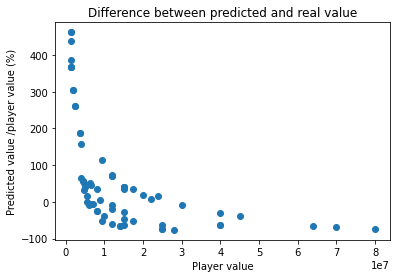

In [31]:
plt.scatter(forwards_2020_young_sorted['player_value'], forwards_2020_young_sorted['predicted_value_diff_percent'])
plt.title('Difference between predicted and real value')
plt.xlabel('Player value')
plt.ylabel('Predicted value /player value (%)')

In [32]:
forwards.guid.unique()

array([ 482,  570,  216,   95,  238,  208, 1334,  859,   24,  266, 1426,
        402,  684,  688,  831,  240,  183,   47,  594, 1080, 1477, 1312,
       1109,  463,   48,  467,  215, 1255,  847, 1135, 1136,   25,  916,
       1320,  832,  612, 1385,  552, 1404, 1341,  212,  641,  545,  665,
         52, 1241, 1237,  726,   69,  310, 1004, 1245, 1468,  948,  830,
        121,  882,  984, 1054, 1283,  752,   11,  736,  477,  373,  534,
        376,   51,  334,  506, 1159, 1079,  943,  760,  313,   71,  492,
        784,  292,  213,  803,  290, 1206,  469,  568,  589,  781,  468,
        850,  499,  120,  950, 1174,  713,  961,  517,  848,  423,  566,
        269,  354,   22,  578,  525, 1101,  895,  543,  785, 1475, 1302,
        184,   50,   97,  548,  993,   68,  642,  377,  635,  636, 1123,
        257, 1163,  725,  425,  949,  144,  335, 1083,  956, 1253,  446,
         70,  628,  447,  715, 1042,  678,   66,  757,  312,  185,  549,
        551, 1205,   49,  714,  424, 1266,  574,  4

In [33]:
forwards_2020_young_sorted.guid.unique()

array([1404, 1320, 1302, 1109, 1385, 1255,  240, 1136,  847, 1283,  612,
        545, 1135,  882,  594, 1477,  665, 1004, 1341,   52,  859, 1334,
       1163], dtype=int64)

In [34]:
def get_players_with_higher_predicted_value(data, min_precent, max_percent):
    players_with_higher_than_actual_value = dict()
    for index, row in data.iterrows():
        if row['predicted_value_diff_percent'] > min_precent and row['predicted_value_diff_percent'] < 400:
            i = row['guid']
            if i in players_with_higher_than_actual_value.keys():
                pass
            players_with_higher_than_actual_value[i] = row
            print(row['first_name'], row['second_name'], row['guid'])
    return players_with_higher_than_actual_value
                                                    

In [35]:
columns = forwards_2020_young_sorted.columns
perspective_players = get_players_with_higher_predicted_value(forwards_2020_young_sorted, 5, 400)
print(perspective_players)
perspective_players_df = pd.DataFrame(columns=columns)

for k in perspective_players.keys():
    perspective_players_df = perspective_players_df.append(perspective_players[k])

Joe Gelhardt 1404
Andi Zeqiri 1320
Andi Zeqiri 1320
Andi Zeqiri 1320
Leonardo Campana 1302
Leonardo Campana 1302
Keinan Davis 1109
Keinan Davis 1109
Tyler Roberts 1385
Tyler Roberts 1385
Tyler Roberts 1385
Che Adams 1255
Kelechi Iheanacho 240
Che Adams 1255
Che Adams 1255
Aaron Connolly 1136
Michael Obafemi 847
Michael Obafemi 847
Albian Ajeti 1283
Josh Maja 612
Josh Maja 612
Michael Obafemi 847
Kelechi Iheanacho 240
Kelechi Iheanacho 240
Kelechi Iheanacho 240
Che Adams 1255
Oliver McBurnie 545
Neal Maupay 1135
Oliver Burke 882
Neal Maupay 1135
Dominic Calvert-Lewin 594
Oliver Burke 882
Neal Maupay 1135
Fabio Silva 1477
{1404: first_name                                                      Joe
second_name                                                Gelhardt
guid                                                           1404
id                                                             3363
player_id_transfermarkt                                        4279
player_id_fpl            

In [36]:
perspective_players_df

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
1458,Joe,Gelhardt,1404,3363,4279,1404,Joe Gelhardt,2002-05-04 00:00:00,Centre-Forward,England,...,2020,4279,2020-02-27 00:00:00,1500000,Wigan Athletic,/joe-gelhardt/profil/spieler/503980,18,7.307802e+06,5.807802e+06,387.186777
1914,Andi,Zeqiri,1320,3272,4175,1320,Andi Zeqiri,1999-06-22 00:00:00,Centre-Forward,Switzerland,...,2020,4175,2020-07-31 00:00:00,1500000,FC Lausanne Sport,/andi-zeqiri/profil/spieler/345468,21,7.000576e+06,5.500576e+06,366.705039
5027,Leonardo,Campana,1302,2701,3481,1302,Leonardo Campana,2000-07-24 00:00:00,Centre-Forward,Ecuador,...,2020,3481,2020-10-22 00:00:00,1800000,FC Famalic E3o,/leonardo-campana/profil/spieler/606872,20,7.307802e+06,5.507802e+06,305.988981
2907,Keinan,Davis,1109,412,630,1109,Keinan Davis,1998-02-13 00:00:00,Centre-Forward,England,...,2020,630,2020-10-13 00:00:00,2300000,Aston Villa,/keinan-davis/profil/spieler/412660,22,8.311144e+06,6.011144e+06,261.354090
1456,Tyler,Roberts,1385,393,581,1385,Tyler Roberts,1999-01-12 00:00:00,Second Striker,Wales,...,2020,581,2020-02-27 00:00:00,4000000,Leeds United,/tyler-roberts/profil/spieler/296986,21,1.035093e+07,6.350932e+06,158.773301
953,Che,Adams,1255,2829,3639,1255,Che Adams,1996-07-13 00:00:00,Centre-Forward,Scotland,...,2020,3639,2020-12-17 00:00:00,15000000,Southampton FC,/che-adams/profil/spieler/346779,24,2.039212e+07,5.392120e+06,35.947469
2864,Kelechi,Iheanacho,240,47,77,240,Kelechi Iheanacho,1996-10-03 00:00:00,Centre-Forward,Nigeria,...,2020,77,2020-10-13 00:00:00,15000000,Leicester City,/kelechi-iheanacho/profil/spieler/295330,24,2.087432e+07,5.874315e+06,39.162102
291,Aaron,Connolly,1136,1729,2257,1136,Aaron Connolly,2000-01-28 00:00:00,Centre-Forward,Ireland,...,2020,2257,2020-04-08 00:00:00,4000000,Brighton Hove Albion,/aaron-connolly/profil/spieler/434207,20,6.641138e+06,2.641138e+06,66.028455
2542,Michael,Obafemi,847,1477,1964,847,Michael Obafemi,2000-07-06 00:00:00,Centre-Forward,Ireland,...,2020,1964,2020-03-09 00:00:00,5000000,Southampton FC,/michael-obafemi/profil/spieler/444208,20,7.050026e+06,2.050026e+06,41.000528
3632,Albian,Ajeti,1283,2677,3439,1283,Albian Ajeti,1997-02-26 00:00:00,Centre-Forward,Switzerland,...,2020,3439,2020-04-08 00:00:00,4800000,West Ham United,/albian-ajeti/profil/spieler/195906,23,7.307802e+06,2.507802e+06,52.245868


#### Finding similar players to found perspective players

In [37]:
players_stats_2020 = pd.read_sql_query("SELECT * from player_statistics as p " + \
                                        "WHERE p.year = {}".format(2020), cnx)
players_stats_2020.columns
player_names = players_stats_2020.iloc[:, [0, 1, 2, -2, -1]]
player_data = players_stats_2020.iloc[:, 3:-2]
print(player_names)
print(player_data)
print(player_data.columns)

     guid      first_name           second_name  now_cost element_type
0      13           Mesut                  Özil      67.0          MID
1     901        Sokratis      Papastathopoulos      48.0          DEF
2     569           David  Luiz Moreira Marinho      54.0          DEF
3     688  Pierre-Emerick            Aubameyang     113.0          MID
4     300          Cédric                Soares      46.0          DEF
..    ...             ...                   ...       ...          ...
686  1486         Andreas           Söndergaard      40.0           GK
687  1292         Patrick               Cutrone      59.0          FWD
688  1487           Nigel               Lonwijk      40.0          DEF
689  1488    Willian José              Da Silva      68.0          FWD
690  1489            Hugo                 Bueno      40.0          DEF

[691 rows x 5 columns]
     goals_scored  assists  total_points  minutes  goals_conceded  creativity  \
0               0        0             0   

In [38]:
from sklearn import preprocessing

x = player_data.values #returns a numpy array
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.456001,-0.525829,-0.890898,-0.977781,-0.950333,-0.655517,-0.864446,-0.601957,-0.604829,-0.904179,-0.802641,-0.822575,-0.234439,-0.730078,-0.293348,0.0
1,-0.456001,-0.525829,-0.890898,-0.977781,-0.950333,-0.655517,-0.864446,-0.601957,-0.604829,-0.904179,-0.802641,-0.822575,-0.234439,-0.730078,-0.363670,0.0
2,-0.059154,-0.525829,0.066468,0.507614,0.493396,-0.415373,0.254186,-0.072224,-0.604829,0.345609,-0.074565,-0.009026,4.265495,-0.172637,-0.240606,0.0
3,3.115623,-0.032820,1.693992,1.240364,0.854328,0.897980,1.093847,2.546291,1.476529,0.810777,1.770484,1.075705,-0.234439,0.384803,1.060352,0.0
4,-0.456001,-0.032820,-0.220742,-0.155509,-0.156282,-0.045594,-0.357723,-0.317710,0.019579,-0.203625,-0.284109,-0.280209,-0.234439,-0.172637,-0.310928,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,-0.456001,-0.525829,-0.890898,-0.977781,-0.950333,-0.655517,-0.864446,-0.601957,-0.604829,-0.904179,-0.802641,-0.822575,-0.234439,-0.730078,-0.328509,0.0
687,-0.456001,-0.525829,-0.843030,-0.952362,-0.950333,-0.655517,-0.864446,-0.584730,-0.604829,-0.876157,-0.799089,-0.822575,-0.234439,-0.730078,-0.381250,0.0
688,-0.456001,-0.525829,-0.890898,-0.977781,-0.950333,-0.655517,-0.864446,-0.601957,-0.604829,-0.904179,-0.802641,-0.822575,-0.234439,-0.730078,-0.381250,0.0
689,-0.456001,-0.032820,-0.316478,-0.084776,-0.372841,0.073946,-0.661391,0.164648,-0.604829,-0.467033,-0.166907,0.262156,-0.234439,-0.730078,-0.346089,0.0


In [39]:
def get_index_for_player_guid(players, guid):
    player_id = players[(players['guid'] == guid)].index
    print(player_id)
    return player_id


from scipy.spatial import distance
def get_player_row(player_data, index):
    return player_data.iloc[index, :]

def get_distances_for_player(player_data, player):
    distances = dict()
    for index, row in player_data.iterrows():
        dist = distance.euclidean(player, row)
        distances[index] = dist
    return distances


def sort_dict_by_value(distances):
    return sorted(distances.items(), key=lambda x: x[1])

In [40]:
def divide_dataframe(players):
    names = players.iloc[:, [0, 1, 2, -2, -1]]
    stats = players.iloc[:, 3:-2]
    return names, stats

def find_closest_players_for_player_in_season(neighbours_season, players_df, guid, n=5):
    cnx = sqlite3.connect('Database/fpa-database.db')
    counter = 0
    index  = get_index_for_player_guid(players_df, guid)
        
    possible_neighbours = pd.read_sql_query("SELECT * from player_statistics as p " + \
                                        "WHERE p.year = {}".format(neighbours_season), cnx)
    
    possible_neighbours_names, possible_neighbours_stats = divide_dataframe(possible_neighbours)
    names, stats = divide_dataframe(players_df)
    
    
    try:
        index = index.tolist()[0]
    except:
        return dict()
    
    player_data = names.iloc[index, :]
    print(player_data)
    
    player_row = get_player_row(stats, index)
    distances = get_distances_for_player(possible_neighbours_stats, player_row)
    distances = sort_dict_by_value(distances)
    neighbours = dict()
    
    for i in range(1, len(distances)):
        ind = distances[i][0]
        player_data = (possible_neighbours_names.iloc[ind, :])
        neighbours[ind] = player_data
        counter = counter + 1 
        if counter == n:
            return neighbours

In [41]:
def get_guid_for_player(dataframe, first_name, second_name ):
    try:
        player = players_with_values[(dataframe['first_name'] == first_name) & (dataframe['second_name'] == second_name)]
        player_guid = player['guid'].values[0]
        return player_guid
    except:
        raise PlayerNotFound()
    
class PlayerNotFound(Exception):
    pass

In [42]:
try:
    guid = get_guid_for_player(players_with_values, 'Josh', 'Maja')
    print(guid)
    closest_players = find_closest_players_for_player_in_season(2020, players_stats_2020, guid=guid)
    print(closest_players)
except PlayerNotFound:
    print('Player not found')

612
Int64Index([273], dtype='int64')
guid             612
first_name      Josh
second_name     Maja
now_cost        53.0
element_type     FWD
Name: 273, dtype: object
{554: guid               392
first_name        Erik
second_name     Lamela
now_cost          57.0
element_type       MID
Name: 554, dtype: object, 361: guid             1016
first_name       Naby
second_name     Keita
now_cost         52.0
element_type      MID
Name: 361, dtype: object, 168: guid                   95
first_name          Michy
second_name     Batshuayi
now_cost             57.0
element_type          FWD
Name: 168, dtype: object, 91: guid                1136
first_name         Aaron
second_name     Connolly
now_cost            52.0
element_type         FWD
Name: 91, dtype: object, 515: guid                1180
first_name        Takumi
second_name     Minamino
now_cost            60.0
element_type         MID
Name: 515, dtype: object}


#### Wingers

In [44]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
corr = wingers.corr()
wingers_corr = corr['player_value']
wingers_corr = wingers_corr.sort_values(ascending=False)
print(wingers_corr)
wingers_corr.keys()

player_value               1.000000
threat                     0.726484
goals_scored               0.697989
current_value              0.667823
ict_index                  0.660242
total_points               0.648735
influence                  0.642408
bonus                      0.640514
selected_by_percent        0.627639
bps                        0.596322
clean_sheets               0.588639
assists                    0.556583
creativity                 0.493205
minutes                    0.469084
year                       0.224381
yellow_cards               0.210735
goals_conceded             0.201814
red_cards                  0.032283
season                    -0.017750
age                       -0.018887
player_id_fpl             -0.067483
guid                      -0.067483
id                        -0.088029
current_club_id           -0.093864
player_id_transfermarkt   -0.096551
Name: player_value, dtype: float64


Index(['player_value', 'threat', 'goals_scored', 'current_value', 'ict_index',
       'total_points', 'influence', 'bonus', 'selected_by_percent', 'bps',
       'clean_sheets', 'assists', 'creativity', 'minutes', 'year',
       'yellow_cards', 'goals_conceded', 'red_cards', 'season', 'age',
       'player_id_fpl', 'guid', 'id', 'current_club_id',
       'player_id_transfermarkt'],
      dtype='object')

In [45]:
wingers_training_parametes = ['threat', 'goals_scored', 'ict_index',
       'total_points', 'influence', 'bonus']
target = 'player_value'
wingers_fit = fit_linear_regression(wingers, wingers_training_parametes , target)

predicted_value = wingers_fit.predict(wingers[wingers_training_parametes])
predicted_value

array([ 5.53736512e+06,  1.54418389e+07,  6.46826514e+06,  1.71361446e+07,
        1.86696365e+07,  5.82123740e+07,  1.55979259e+07,  3.98331788e+07,
        5.94525136e+07,  3.08876504e+07,  3.78566216e+06,  1.20629832e+07,
        2.50966859e+07,  1.38090306e+07,  3.60307254e+07,  1.65335120e+07,
        2.35085608e+07,  5.02284337e+05,  1.86596025e+07,  1.33794445e+07,
        4.47295302e+07,  2.87461853e+07,  7.31107541e+06,  7.60070388e+06,
        3.41972211e+06,  1.07257385e+07,  3.98316785e+07,  2.09116844e+07,
        3.57833547e+07,  8.94156664e+06,  2.60541804e+07,  8.47613313e+06,
        1.31066106e+07,  1.98605831e+06,  7.43035026e+06,  1.42742745e+07,
        1.73912970e+07,  5.17442573e+06,  1.26566991e+07,  9.94684341e+06,
        2.95242906e+07,  1.14938330e+07,  3.76514791e+07,  4.02854338e+07,
        4.00249272e+06, -1.64818279e+06,  7.12940187e+06,  7.02080381e+06,
        5.48932749e+06,  1.96454426e+07,  1.06391576e+07,  7.90376637e+06,
        4.99922929e+07,  

In [46]:
wingers['predicted_value'] = predicted_value
get_predicted_value_diff(wingers)
wingers.sort_values('predicted_value_diff', ascending=False)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
3482,Mohamed,Salah,802,1335,1805,802,Mohamed Salah,1992-06-15 00:00:00,Right Winger,Egypt,...,2017,1805,2017-01-02 00:00:00,30000000,AS Roma,/mohamed-salah/profil/spieler/148455,25,1.036516e+08,7.365161e+07,245.505366
3485,Mohamed,Salah,802,1335,1805,802,Mohamed Salah,1992-06-15 00:00:00,Right Winger,Egypt,...,2017,1805,2017-06-08 00:00:00,35000000,AS Roma,/mohamed-salah/profil/spieler/148455,25,1.036516e+08,6.865161e+07,196.147457
3489,Mohamed,Salah,802,1335,1805,802,Mohamed Salah,1992-06-15 00:00:00,Right Winger,Egypt,...,2017,1805,2017-10-23 00:00:00,40000000,Liverpool FC,/mohamed-salah/profil/spieler/148455,25,1.036516e+08,6.365161e+07,159.129024
1572,Nathan,Redmond,303,442,698,303,Nathan Redmond,1994-03-06 00:00:00,Left Winger,England,...,2016,698,2016-02-09 00:00:00,7500000,Norwich City,/nathan-redmond/profil/spieler/129078,22,4.984587e+07,4.234587e+07,564.611607
510,Nathan,Redmond,303,442,698,303,Nathan Redmond,1994-03-06 00:00:00,Left Winger,England,...,2016,698,2016-08-01 00:00:00,10000000,Southampton FC,/nathan-redmond/profil/spieler/129078,22,4.984587e+07,3.984587e+07,398.458705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,Raheem,Sterling,227,43,72,227,Raheem Sterling,1994-12-08 00:00:00,Left Winger,England,...,2020,72,2020-04-08 00:00:00,128000000,Manchester City,/raheem-sterling/profil/spieler/134425,26,5.821237e+07,-6.978763e+07,-54.521583
2746,Raheem,Sterling,227,43,72,227,Raheem Sterling,1994-12-08 00:00:00,Left Winger,England,...,2020,72,2020-10-13 00:00:00,128000000,Manchester City,/raheem-sterling/profil/spieler/134425,26,5.821237e+07,-6.978763e+07,-54.521583
643,Sadio,Mane,211,232,344,211,Sadio Mané,1992-04-10 00:00:00,Left Winger,Senegal,...,2019,344,2019-12-10 00:00:00,150000000,Liverpool FC,/sadio-mane/profil/spieler/200512,27,6.405770e+07,-8.594230e+07,-57.294865
5046,Leroy,Sane,488,526,830,488,Leroy Sané,1996-01-11 00:00:00,Right Winger,Germany,...,2019,830,2019-12-10 00:00:00,100000000,Manchester City,/leroy-sane/profil/spieler/192565,23,7.787132e+06,-9.221287e+07,-92.212868


#### Finding perspective young wingers in current season

In [47]:
wingers_2020_young = get_player_for_given_season(wingers, season=2020, max_age=26)
wingers_2020_young_sorted = wingers_2020_young.sort_values('predicted_value_diff_percent', ascending=False)
wingers_2020_young_sorted.iloc[0:60, :]

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
4601,Indiana,Vassilev,1121,2951,3784,1121,Indiana Vassilev,2001-02-16 00:00:00,Left Winger,United States,...,2020,3784,2020-02-11 00:00:00,250000,Aston Villa U23,/indiana-vassilev/profil/spieler/469860,19,7.430350e+06,7.180350e+06,2872.140103
5667,Rolando,Aarons,836,209,309,836,Rolando Aarons,1995-11-16 00:00:00,Left Winger,England,...,2020,309,2020-10-13 00:00:00,400000,Newcastle United,/rolando-aarons/profil/spieler/258188,25,7.430350e+06,7.030350e+06,1757.587564
5666,Rolando,Aarons,836,209,309,836,Rolando Aarons,1995-11-16 00:00:00,Left Winger,England,...,2020,309,2020-04-08 00:00:00,400000,Motherwell FC,/rolando-aarons/profil/spieler/258188,25,7.430350e+06,7.030350e+06,1757.587564
2967,Nathan,Tella,1260,2827,3637,1260,Nathan Tella,1999-07-05 00:00:00,Right Winger,England,...,2020,3637,2020-10-13 00:00:00,750000,Southampton FC,/nathan-tella/profil/spieler/340322,21,7.684353e+06,6.934353e+06,924.580450
4815,Jonathan,Leko,444,392,580,444,Jonathan Leko,1999-04-24 00:00:00,Right Winger,England,...,2020,580,2020-10-15 00:00:00,1100000,Birmingham City,/jonathan-leko/profil/spieler/314266,21,7.430350e+06,6.330350e+06,575.486387
4814,Jonathan,Leko,444,392,580,444,Jonathan Leko,1999-04-24 00:00:00,Right Winger,England,...,2020,580,2020-04-08 00:00:00,1300000,West Bromwich Albion,/jonathan-leko/profil/spieler/314266,21,7.430350e+06,6.130350e+06,471.565404
3753,Anthony,Gordon,1166,1373,1848,1166,Anthony Gordon,2001-02-24 00:00:00,Left Winger,England,...,2020,1848,2020-04-08 00:00:00,1300000,Everton FC,/anthony-gordon/profil/spieler/503733,19,6.708819e+06,5.408819e+06,416.062977
4813,Jonathan,Leko,444,392,580,444,Jonathan Leko,1999-04-24 00:00:00,Right Winger,England,...,2020,580,2020-02-27 00:00:00,1500000,West Bromwich Albion,/jonathan-leko/profil/spieler/314266,21,7.430350e+06,5.930350e+06,395.356684
4873,Josh,Sims,1443,830,1205,1443,Josh Sims,1997-03-28 00:00:00,Right Winger,England,...,2020,1205,2020-04-08 00:00:00,1600000,New York Red Bulls,/josh-sims/profil/spieler/286919,23,7.430350e+06,5.830350e+06,364.396891
2905,Anwar,El Ghazi,1105,2952,3785,1105,Anwar El Ghazi,1995-05-03 00:00:00,Right Winger,Netherlands,...,2020,3785,2020-10-13 00:00:00,8000000,Aston Villa,/anwar-el-ghazi/profil/spieler/183720,25,3.578335e+07,2.778335e+07,347.291933


Text(0, 0.5, 'Predicted value /player value (%)')

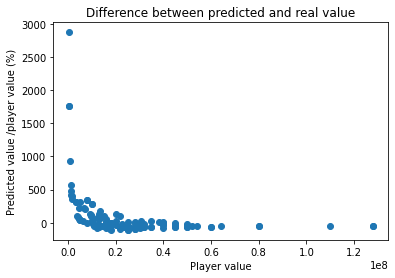

In [48]:
plt.scatter(wingers_2020_young_sorted['player_value'], wingers_2020_young_sorted['predicted_value_diff_percent'])
plt.title('Difference between predicted and real value')
plt.xlabel('Player value')
plt.ylabel('Predicted value /player value (%)')

In [49]:
columns = wingers_2020_young_sorted.columns
perspective_wingers = get_players_with_higher_predicted_value(wingers_2020_young_sorted, 5, 800)
print(perspective_wingers)
perspective_wingers_df = pd.DataFrame(columns=columns)

for k in perspective_wingers.keys():
    perspective_wingers_df = perspective_wingers_df.append(perspective_wingers[k])

Jonathan Leko 444
Josh Sims 1443
Anwar El Ghazi 1105
Anwar El Ghazi 1105
Jack Harrison 1382
Jacob Murphy 837
Jacob Murphy 837
Ademola Lookman 626
Ademola Lookman 626
Jack Harrison 1382
Jacob Murphy 837
Jack Harrison 1382
Ademola Lookman 626
Jack Harrison 1382
Leandro Trossard 1133
Bukayo Saka 907
Bertrand Traore 90
Matheus Pereira 1463
Harvey Elliott 997
Bukayo Saka 907
Leandro Trossard 1133
Harvey Elliott 997
Matheus Pereira 1463
Jarrod Bowen 515
Bertrand Traore 90
Grady Diangana 898
Matheus Pereira 1463
Grady Diangana 898
Anthony Gordon 1166
Anthony Gordon 1166
Jack Grealish 1104
Jarrod Bowen 515
Bukayo Saka 907
Takumi Minamino 1180
Takumi Minamino 1180
Tahith Chong 1023
Bukayo Saka 907
Diogo Jota 1075
Nathan Redmond 303
{444: first_name                                                  Jonathan
second_name                                                     Leko
guid                                                             444
id                                                    

In [50]:
perspective_wingers_df

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
4813,Jonathan,Leko,444,392,580,444,Jonathan Leko,1999-04-24 00:00:00,Right Winger,England,...,2020,580,2020-02-27 00:00:00,1500000,West Bromwich Albion,/jonathan-leko/profil/spieler/314266,21,7.430350e+06,5.930350e+06,395.356684
4873,Josh,Sims,1443,830,1205,1443,Josh Sims,1997-03-28 00:00:00,Right Winger,England,...,2020,1205,2020-04-08 00:00:00,1600000,New York Red Bulls,/josh-sims/profil/spieler/286919,23,7.430350e+06,5.830350e+06,364.396891
208,Anwar,El Ghazi,1105,2952,3785,1105,Anwar El Ghazi,1995-05-03 00:00:00,Right Winger,Netherlands,...,2020,3785,2020-04-08 00:00:00,8000000,Aston Villa,/anwar-el-ghazi/profil/spieler/183720,25,3.578335e+07,2.778335e+07,347.291933
3455,Jack,Harrison,1382,1276,1738,1382,Jack Harrison,1996-11-20 00:00:00,Left Winger,England,...,2020,1738,2020-12-17 00:00:00,9000000,Leeds United,/jack-harrison/profil/spieler/417346,24,2.126854e+07,1.226854e+07,136.317066
1428,Jacob,Murphy,837,444,701,837,Jacob Murphy,1995-02-24 00:00:00,Right Winger,England,...,2020,701,2020-02-27 00:00:00,4500000,Sheffield Wednesday,/jacob-murphy/profil/spieler/199527,25,1.427427e+07,9.774275e+06,217.206101
314,Ademola,Lookman,626,716,1075,626,Ademola Lookman,1997-10-20 00:00:00,Left Winger,England,...,2020,1075,2020-04-08 00:00:00,13500000,RB Leipzig,/ademola-lookman/profil/spieler/406040,23,3.765148e+07,2.415148e+07,178.899845
2986,Leandro,Trossard,1133,2889,3710,1133,Leandro Trossard,1994-12-04 00:00:00,Left Winger,Belgium,...,2020,3710,2020-10-13 00:00:00,15000000,Brighton Hove Albion,/leandro-trossard/profil/spieler/144028,26,2.952429e+07,1.452429e+07,96.828604
2838,Bukayo,Saka,907,1971,2568,907,Bukayo Saka,2001-09-05 00:00:00,Right Winger,England,...,2020,2568,2020-10-13 00:00:00,40000000,Arsenal FC,/bukayo-saka/profil/spieler/433177,19,4.472953e+07,4.729530e+06,11.823826
2904,Bertrand,Traore,90,22,33,90,Bertrand Traoré,1995-09-06 00:00:00,Right Winger,Burkina Faso,...,2020,33,2020-10-13 00:00:00,13000000,Aston Villa,/bertrand-traore/profil/spieler/131996,25,2.091168e+07,7.911684e+06,60.859111
3109,Matheus,Pereira,1463,3460,4377,1463,Matheus Pereira,1996-05-05 00:00:00,Right Winger,Brazil,...,2020,4377,2020-10-13 00:00:00,13000000,West Bromwich Albion,/matheus-pereira/profil/spieler/225984,24,1.964544e+07,6.645443e+06,51.118789


#### Finding similar players

In [51]:
try:
    guid = get_guid_for_player(players_with_values, 'Bukayo' , 'Saka')
    print(guid)
    closest_players = find_closest_players_for_player_in_season(2020, players_stats_2020, guid=guid)
    print(closest_players)
except PlayerNotFound:
    print('Player not found')

907
Int64Index([20], dtype='int64')
guid               907
first_name      Bukayo
second_name       Saka
now_cost          52.0
element_type       MID
Name: 20, dtype: object
{154: guid              1334
first_name        Timo
second_name     Werner
now_cost          92.0
element_type       FWD
Name: 154, dtype: object, 82: guid              1135
first_name        Neal
second_name     Maupay
now_cost          60.0
element_type       FWD
Name: 82, dtype: object, 531: guid             1255
first_name        Che
second_name     Adams
now_cost         58.0
element_type      FWD
Name: 531, dtype: object, 636: guid               515
first_name      Jarrod
second_name      Bowen
now_cost          59.0
element_type       MID
Name: 636, dtype: object, 83: guid                1133
first_name       Leandro
second_name     Trossard
now_cost            57.0
element_type         MID
Name: 83, dtype: object}


In [52]:
for p in closest_players.values():
    print(players_with_values[(players_with_values['guid'] == p['guid']) & (players_with_values['year'] == 2020)])

     first_name second_name  guid    id  player_id_transfermarkt  \
83         Timo      Werner  1334  3077                     3941   
2438       Timo      Werner  1334  3077                     3941   
2782       Timo      Werner  1334  3077                     3941   

      player_id_fpl  player_name        date_of_birth player_position  \
83             1334  Timo Werner  1996-03-06 00:00:00  Centre-Forward   
2438           1334  Timo Werner  1996-03-06 00:00:00  Centre-Forward   
2782           1334  Timo Werner  1996-03-06 00:00:00  Centre-Forward   

     nationality  ...  red_cards yellow_cards  selected_by_percent  year  \
83       Germany  ...          0            0                 10.7  2020   
2438     Germany  ...          0            0                 10.7  2020   
2782     Germany  ...          0            0                 10.7  2020   

      transfermarkt_player_id           date_stamp  player_value  player_club  \
83                       3941  2020-04-08 00:00:

#### Midfielders

In [55]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
corr = midfielders.corr()
midfielders_corr = corr['player_value']

midfielders_corr = midfielders_corr.sort_values(ascending=False)
print(midfielders_corr)
print(midfielders_corr.keys())

player_value               1.000000
current_value              0.758086
ict_index                  0.475079
assists                    0.460958
creativity                 0.458015
selected_by_percent        0.446828
influence                  0.441849
total_points               0.439636
threat                     0.437039
bonus                      0.429750
clean_sheets               0.426284
bps                        0.417536
goals_scored               0.395793
minutes                    0.300050
year                       0.147282
yellow_cards               0.129289
goals_conceded             0.108541
red_cards                 -0.016395
age                       -0.027655
season                    -0.041122
player_id_fpl             -0.085436
guid                      -0.085436
id                        -0.113447
current_club_id           -0.114022
player_id_transfermarkt   -0.114662
Name: player_value, dtype: float64
Index(['player_value', 'current_value', 'ict_index', 'assists', '

In [56]:
midfielders_training_parametes = ['ict_index', 'assists', 'creativity',
       'selected_by_percent', 'influence', 'total_points',]
target = 'player_value'
midfielders_fit = fit_linear_regression(midfielders, midfielders_training_parametes , target)

predicted_value = midfielders_fit.predict(midfielders[midfielders_training_parametes])
predicted_value

array([35746732.04343244, 16147720.75734594,  7720389.2341922 , ...,
       19147836.32076138, 22278804.69512939, 22278804.69512939])

In [59]:
midfielders['predicted_value'] = predicted_value
get_predicted_value_diff(midfielders)
midfielders.sort_values('predicted_value_diff', ascending=False)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
1547,Gylfi,Sigurdsson,367,286,430,367,Gylfi Sigurdsson,1989-09-08 00:00:00,Attacking Midfield,Iceland,...,2016,430,2016-02-09 00:00:00,11000000,Swansea City,/gylfi-sigurdsson/profil/spieler/90466,27,4.923739e+07,3.823739e+07,347.612602
1946,Gylfi,Sigurdsson,367,286,430,367,Gylfi Sigurdsson,1989-09-08 00:00:00,Attacking Midfield,Iceland,...,2016,430,2016-06-01 00:00:00,13000000,Swansea City,/gylfi-sigurdsson/profil/spieler/90466,27,4.923739e+07,3.623739e+07,278.749125
4021,Christian,Eriksen,393,156,229,393,Christian Eriksen,1992-02-14 00:00:00,Attacking Midfield,Denmark,...,2016,229,2016-02-09 00:00:00,29000000,Tottenham Hotspur,/christian-eriksen/profil/spieler/69633,24,6.506340e+07,3.606340e+07,124.356540
2386,John,Lundstram,1236,3007,3851,1236,John Lundstram,1994-02-18 00:00:00,Central Midfield,England,...,2019,3851,2019-06-28 00:00:00,500000,Sheffield United,/john-lundstram/profil/spieler/156941,25,3.537955e+07,3.487955e+07,6975.910351
2198,Pascal,Groß,712,1713,2236,712,Pascal Groß,1991-06-15 00:00:00,Central Midfield,Germany,...,2017,2236,2017-06-19 00:00:00,4000000,FC Ingolstadt 04,/pascal-gross/profil/spieler/82873,26,3.854580e+07,3.454580e+07,863.644969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,N'Golo,Kante,94,458,727,94,N'Golo Kanté,1991-03-29 00:00:00,Central Midfield,France,...,2019,727,2019-06-13 00:00:00,100000000,Chelsea FC,/ngolo-kante/profil/spieler/225083,28,1.907307e+07,-8.092693e+07,-80.926925
4030,Christian,Eriksen,393,156,229,393,Christian Eriksen,1992-02-14 00:00:00,Attacking Midfield,Denmark,...,2019,229,2019-06-13 00:00:00,100000000,Tottenham Hotspur,/christian-eriksen/profil/spieler/69633,27,1.723688e+07,-8.276312e+07,-82.763117
3501,Kevin,De Bruyne,234,40,67,234,Kevin De Bruyne,1991-06-28 00:00:00,Attacking Midfield,Belgium,...,2018,67,2018-01-02 00:00:00,110000000,Manchester City,/kevin-de-bruyne/profil/spieler/88755,27,2.111856e+07,-8.888144e+07,-80.801311
3511,Kevin,De Bruyne,234,40,67,234,Kevin De Bruyne,1991-06-28 00:00:00,Attacking Midfield,Belgium,...,2018,67,2018-12-19 00:00:00,150000000,Manchester City,/kevin-de-bruyne/profil/spieler/88755,27,2.111856e+07,-1.288814e+08,-85.920961


In [64]:
midfielders_2020_young = get_player_for_given_season(midfielders, season=2020, max_age=26)
midfielders_2020_young = midfielders_2020_young[(midfielders_2020_young['predicted_value_diff_percent'] < 1000)]
midfielders_2020_young_sorted = midfielders_2020_young.sort_values('predicted_value_diff_percent', ascending=False)
midfielders_2020_young_sorted.iloc[0:60, :]

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
4717,Jayson,Molumby,722,1718,2242,722,Jayson Molumby,1999-08-06 00:00:00,Central Midfield,Ireland,...,2020,2242,2020-10-13 00:00:00,900000,Brighton Hove Albion,/jayson-molumby/profil/spieler/357656,21,9.090975e+06,8.190975e+06,910.108305
4716,Jayson,Molumby,722,1718,2242,722,Jayson Molumby,1999-08-06 00:00:00,Central Midfield,Ireland,...,2020,2242,2020-04-08 00:00:00,900000,Millwall FC,/jayson-molumby/profil/spieler/357656,21,9.090975e+06,8.190975e+06,910.108305
6026,Tommy,Doyle,1188,2434,3112,1188,Tommy Doyle,2001-10-17 00:00:00,Central Midfield,England,...,2020,3112,2020-10-13 00:00:00,1000000,Manchester City U23,/tommy-doyle/profil/spieler/433183,19,9.409530e+06,8.409530e+06,840.952997
5728,Sam,Field,510,386,572,510,Sam Field,1998-05-08 00:00:00,Central Midfield,England,...,2020,572,2020-10-13 00:00:00,1000000,West Bromwich Albion,/sam-field/profil/spieler/387331,22,9.293141e+06,8.293141e+06,829.314088
5727,Sam,Field,510,386,572,510,Sam Field,1998-05-08 00:00:00,Central Midfield,England,...,2020,572,2020-04-08 00:00:00,1000000,Charlton Athletic,/sam-field/profil/spieler/387331,22,9.293141e+06,8.293141e+06,829.314088
4715,Jayson,Molumby,722,1718,2242,722,Jayson Molumby,1999-08-06 00:00:00,Central Midfield,Ireland,...,2020,2242,2020-02-27 00:00:00,1000000,Millwall FC,/jayson-molumby/profil/spieler/357656,21,9.090975e+06,8.090975e+06,809.097474
3116,Moises,Caicedo,1329,3261,4163,1329,Moisés Caicedo,2001-11-02 00:00:00,Central Midfield,Ecuador,...,2020,4163,2020-10-14 00:00:00,1200000,Independiente del Valle,/moises-caicedo/profil/spieler/687626,19,9.312096e+06,8.112096e+06,676.007982
5726,Sam,Field,510,386,572,510,Sam Field,1998-05-08 00:00:00,Central Midfield,England,...,2020,572,2020-02-27 00:00:00,1200000,Charlton Athletic,/sam-field/profil/spieler/387331,22,9.293141e+06,8.093141e+06,674.428407
58,Curtis,Jones,805,1333,1803,805,Curtis Jones,2001-01-30 00:00:00,Attacking Midfield,England,...,2020,1803,2020-04-08 00:00:00,1800000,Liverpool FC U23,/curtis-jones/profil/spieler/433188,19,1.315303e+07,1.135303e+07,630.724155
939,Owen,Otasowie,1296,2691,3463,1296,Owen Otasowie,2001-01-06 00:00:00,Defensive Midfield,United States,...,2020,3463,2020-12-17 00:00:00,1500000,Wolverhampton Wanderers U23,/owen-otasowie/profil/spieler/511815,19,1.074978e+07,9.249780e+06,616.651972


Text(0, 0.5, 'Predicted value /player value (%)')

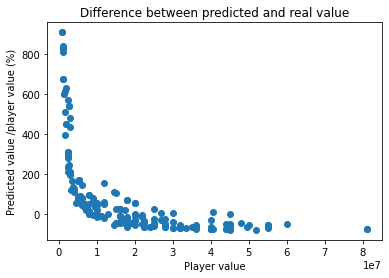

In [65]:
plt.scatter(midfielders_2020_young_sorted['player_value'], midfielders_2020_young_sorted['predicted_value_diff_percent'])
plt.title('Difference between predicted and real value')
plt.xlabel('Player value')
plt.ylabel('Predicted value /player value (%)')

#### Finding perspective midfielders in current season

In [71]:
columns = midfielders_2020_young_sorted.columns
perspective_midfielders = get_players_with_higher_predicted_value(midfielders_2020_young_sorted, 5, 500)
perspective_midfielders_df = pd.DataFrame(columns=columns)

for k in perspective_midfielders.keys():
    perspective_midfielders_df = perspective_midfielders_df.append(perspective_midfielders[k])

Jacob Ramsey 1313
Rekeem Harper 613
Rekeem Harper 613
Faustino Anjorin 1154
Steven Alzate 1138
Rekeem Harper 613
James Garner 1022
Matthew Longstaff 1195
Jamie Shackleton 1389
Jamie Shackleton 1389
Max Meyer 964
James Garner 1022
Jamie Shackleton 1389
Jakub Moder 1323
Conor Gallagher 1465
Conor Gallagher 1465
James Garner 1022
Curtis Jones 805
Curtis Jones 805
Tomas Soucek 1289
Conor Gallagher 1465
Matthew Longstaff 1195
Percy Tau 1322
Percy Tau 1322
Jairo Riedewald 746
Josh Onomah 1360
James Ward-Prowse 305
Matthew Longstaff 1195
Tomas Soucek 1289
John Lundstram 1236
John Lundstram 1236
Josh Brownhill 1144
Josh Brownhill 1144
Moises Caicedo 1329
Percy Tau 1322
Okay Yokuslu 1469
Okay Yokuslu 1469
Harrison Reed 306
Josh Onomah 1360
Billy Gilmour 1153
Tomas Soucek 1289
James Ward-Prowse 305
Matthew Longstaff 1195
Matthew Longstaff 1195
Eberechi Eze 1339
Kalvin Phillips 1383
John Lundstram 1236
Billy Gilmour 1153
Jairo Riedewald 746
Tomas Soucek 1289
James Ward-Prowse 305
Pierre-Emile Høj

In [72]:
perspective_midfielders_df

,first_name,second_name,guid,id,player_id_transfermarkt,player_id_fpl,player_name,date_of_birth,player_position,nationality,...,year,transfermarkt_player_id,date_stamp,player_value,player_club,player_url,age,predicted_value,predicted_value_diff,predicted_value_diff_percent
3368,Jacob,Ramsey,1313,2948,3780,1313,Jacob Ramsey,2001-05-28 00:00:00,Attacking Midfield,England,...,2020,3780,2020-12-17 00:00:00,1500000,Aston Villa,/jacob-ramsey/profil/spieler/503749,19,7.456021e+06,5.956021e+06,397.068054
5636,Rekeem,Harper,613,1052,1457,613,Rekeem Harper,2000-03-08 00:00:00,Central Midfield,England,...,2020,1457,2020-02-27 00:00:00,2500000,West Bromwich Albion,/rekeem-harper/profil/spieler/456877,20,9.457244e+06,6.957244e+06,278.289758
4380,Faustino,Anjorin,1154,2522,3244,1154,Faustino Anjorin,2001-11-23 00:00:00,Attacking Midfield,England,...,2020,3244,2020-04-08 00:00:00,2300000,Chelsea FC U23,/faustino-anjorin/profil/spieler/433181,19,9.312096e+06,7.012096e+06,304.873730
2983,Steven,Alzate,1138,2884,3700,1138,Steven Alzate,1998-09-08 00:00:00,Central Midfield,Colombia,...,2020,3700,2020-10-13 00:00:00,7000000,Brighton Hove Albion,/steven-alzate/profil/spieler/476237,22,9.034517e+06,2.034517e+06,29.064529
4665,James,Garner,1022,1893,2480,1022,James Garner,2001-03-13 00:00:00,Defensive Midfield,England,...,2020,2480,2020-12-22 00:00:00,3500000,Watford FC,/james-garner/profil/spieler/505219,19,9.312096e+06,5.812096e+06,166.059879
2943,Matthew,Longstaff,1195,2726,3509,1195,Matthew Longstaff,2000-03-21 00:00:00,Central Midfield,England,...,2020,3509,2020-10-13 00:00:00,5000000,Newcastle United,/matthew-longstaff/profil/spieler/484387,20,8.417349e+06,3.417349e+06,68.346989
1455,Jamie,Shackleton,1389,3358,4270,1389,Jamie Shackleton,1999-10-08 00:00:00,Central Midfield,England,...,2020,4270,2020-02-27 00:00:00,2500000,Leeds United,/jamie-shackleton/profil/spieler/534700,21,7.726396e+06,5.226396e+06,209.055832
5287,Max,Meyer,964,2138,2750,964,Max Meyer,1995-09-18 00:00:00,Attacking Midfield,Germany,...,2020,2750,2020-04-08 00:00:00,8000000,Crystal Palace,/max-meyer/profil/spieler/146164,25,9.312096e+06,1.312096e+06,16.401197
601,Jakub,Moder,1323,3257,4159,1323,Jakub Moder,1999-04-07 00:00:00,Central Midfield,Poland,...,2020,4159,2020-08-18 00:00:00,3000000,Lech Poznan,/jakub-moder/profil/spieler/384461,21,8.873310e+06,5.873310e+06,195.776994
970,Conor,Gallagher,1465,1834,2404,1465,Conor Gallagher,2000-02-06 00:00:00,Central Midfield,England,...,2020,2404,2020-12-17 00:00:00,10000000,West Bromwich Albion,/conor-gallagher/profil/spieler/488362,20,1.465979e+07,4.659789e+06,46.597888


#### Find similar players

In [76]:
try:
    guid = get_guid_for_player(players_with_values, 'Phil' , 'Foden')
    print(guid)
    closest_players = find_closest_players_for_player_in_season(2016, players_stats_2020, guid=guid)
    print(closest_players)
except PlayerNotFound:
    print('Player not found')

811
Int64Index([394], dtype='int64')
guid              811
first_name       Phil
second_name     Foden
now_cost         60.0
element_type      MID
Name: 394, dtype: object
{266: guid                266
first_name      Anthony
second_name     Martial
now_cost           None
element_type       None
Name: 266, dtype: object, 51: guid               51
first_name      Benik
second_name     Afobe
now_cost         None
element_type     None
Name: 51, dtype: object, 41: guid                   41
first_name         Junior
second_name     Stanislas
now_cost             None
element_type         None
Name: 41, dtype: object, 268: guid               268
first_name       Wayne
second_name     Rooney
now_cost          None
element_type      None
Name: 268, dtype: object, 267: guid                   267
first_name         Henrikh
second_name     Mkhitaryan
now_cost              None
element_type          None
Name: 267, dtype: object}
